<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/MachineLearningWithPython/blob/main/colab/final/07 - Project - Deep Neural Network.ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# Project: Deep Neural Network
- Identify false banknotes

### Step 1: Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/banknotes.csv**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/banknotes.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [ ]:
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

### Step 3: Investitigate the data
- Check how many classes (class)
    - HINT: use [unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)
- Check for missing data
    - HINT: use [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)[.sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [ ]:
data['class'].unique()

array([1, 0])

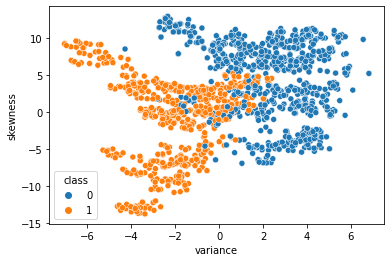

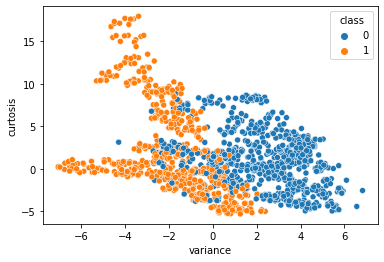

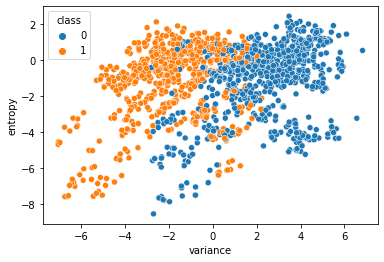

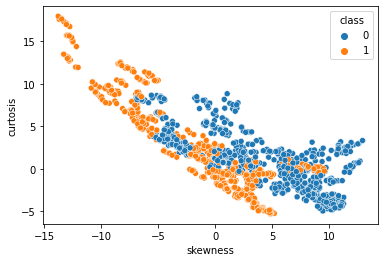

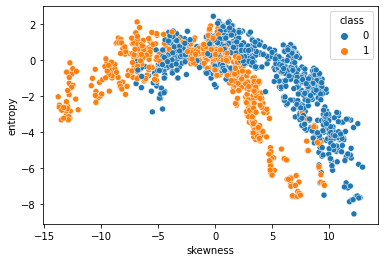

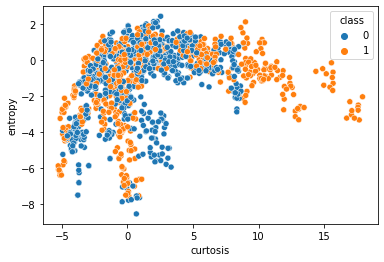

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(len(data.columns)-1):
 for j in range(i+1, len(data.columns)-1):
    x_label = data.columns[i]
    y_label = data.columns[j]
    sns.scatterplot(x=x_label, y=y_label, data=data, hue='class')
    plt.show()

### Step 4: Divite data into feature vectors and labels
- Assign the feature vectors to $X$
    - HINT: that is all but the last column of the data
- Assign the labels to $y$
    - HINT: that is the last column (**class**)

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

### Step 5: Create training and test datasets
- Split $X$ and $y$ into train and test sets using **train_test_split** with **test_size=.4**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4, random_state=42)

### Step 6: Create and compile the model
- Create a **Sequential** model
    - **Dense** with 8 nodes with **input_dim=4, activaition='relu'**
    - **Dense** with 1 (the output node) with **activaition='sigmoid'**
- Complie the model with **optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']**

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(8, input_dim=4, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test, verbose=2)


Epoch 1/20
26/26 [==============================] - 1s 2ms/step - loss: 1.2150 - accuracy: 0.2734
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 0.8654 - accuracy: 0.3803
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5176
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6245
Epoch 5/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.6877
Epoch 6/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7327
Epoch 7/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7704
Epoch 8/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8068
Epoch 9/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8396
Epoch 10/20
26/26 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8591
Epoch 11/20
26/26 [

[0.24189060926437378, 0.9562841653823853]

### Step 7: Fit and test the accuracy
- Fit the model on training data with **epochs=20**
- Evaluate the model with test data with **verbose=2**

Epoch 1/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.7278
Epoch 2/20
26/26 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.7995
Epoch 3/20
26/26 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8578
Epoch 4/20
26/26 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.8967
Epoch 5/20
26/26 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9526
Epoch 6/20
26/26 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9793
Epoch 7/20
26/26 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9903
Epoch 8/20
26/26 [==============================] - 0s 1ms/step - loss: 0.1599 - accuracy: 0.9939
Epoch 9/20
26/26 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9964
Epoch 10/20
26/26 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9964
Epoch 11/20
26/26 [

[0.05799677222967148, 0.9963570237159729]

### Step 8 (Optional): Add another hidden layer
- Add another hidden layer in the model
- Test performance

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(8, input_dim=4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
26/26 [==============================] - 1s 2ms/step - loss: 0.5866 - accuracy: 0.5857
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.6112
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.6671
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7303
Epoch 5/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8360
Epoch 6/20
26/26 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.9320
Epoch 7/20
26/26 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.9660
Epoch 8/20
26/26 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9866
Epoch 9/20
26/26 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9927
Epoch 10/20
26/26 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9878
Epoch 11/20
26/26 [

[0.03441808372735977, 1.0]

Epoch 1/20
26/26 [==============================] - 1s 1ms/step - loss: 0.6806 - accuracy: 0.6124
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6586
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6768
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.6987
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7193
Epoch 6/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7254
Epoch 7/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7436
Epoch 8/20
26/26 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7485
Epoch 9/20
26/26 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.7618
Epoch 10/20
26/26 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.7740
Epoch 11/20
26/26 [

[0.14443998038768768, 0.9854280352592468]